In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import shutil

# Load the CSV files
df1 = pd.read_csv('/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/cxr-provider-list.csv')
df2 = pd.read_csv('/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/cxr-record-list.csv')
df3 = pd.read_csv('/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/cxr-study-list.csv')
df4 = pd.read_csv('/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/mimic-cxr-2.0.0-chexpert.csv')
df5 = pd.read_csv('/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/mimic-cxr-2.0.0-split.csv')
df6 = pd.read_csv('/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/mimic-cxr-2.0.0-metadata.csv')

# Merge the dataframes on 'study_id'
merged_df = pd.merge(df1, df2, on='study_id', how='outer')
merged_df = pd.merge(merged_df, df3, on='study_id', how='outer')
merged_df = pd.merge(merged_df, df4, on='study_id', how='outer')

# Before merging with df5, drop or rename the existing 'subject_id' columns if necessary
# For example, to drop 'subject_id_x', uncomment the following line:
# merged_df = merged_df.drop(columns=['subject_id_x'])

# Alternatively, rename the column to avoid conflict:
merged_df = merged_df.rename(columns={'subject_id_x': 'subject_id_original'})

# Merge with df5
merged_df = pd.merge(merged_df, df5, on='dicom_id', how='outer')

# Keep only the filename in image and report paths
merged_df['path_x'] = merged_df['path_x'].apply(os.path.basename)
merged_df['path_y'] = merged_df['path_y'].apply(os.path.basename)

# Merge df6 with merged_df on dicom_id
merged_df = pd.merge(merged_df, df6, left_on='dicom_id', right_on='dicom_id', how='outer')

# Display the first few rows of the final merged dataframe
merged_df.head()

,study_id_x,ordering_provider_id,attending_provider_id,resident_provider_id,subject_id_original,dicom_id,path_x,subject_id_y,path_y,subject_id_x,...,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,51332563,P02XZO,P86AVY,NaN,17191670,00000218-9fb20d4e-86045713-8013e08b-0d5bebba,00000218-9fb20d4e-86045713-8013e08b-0d5bebba.dcm,17191670,s51332563.txt,17191670.0,...,51332563,CHEST (PA AND LAT),LATERAL,3056,2544,21761024,211122.515,CHEST (PA AND LAT),lateral,Erect
1,55245226,P80LEI,P374WB,NaN,10934092,000046e4-e4d7f796-72c3dba4-8b67a485-0eea211d,000046e4-e4d7f796-72c3dba4-8b67a485-0eea211d.dcm,10934092,s55245226.txt,10934092.0,...,55245226,CHEST (PORTABLE AP),AP,2539,3050,21640716,205111.281,CHEST (PORTABLE AP),antero-posterior,Erect
2,59116935,P755JC,P26C49,NaN,14851532,00005197-869d72f3-66210bf4-fa2c9d83-b613c4e7,00005197-869d72f3-66210bf4-fa2c9d83-b613c4e7.dcm,14851532,s59116935.txt,14851532.0,...,59116935,CHEST (PORTABLE AP),AP,2544,3056,21921014,173307.734,CHEST (PORTABLE AP),antero-posterior,Erect
3,53667003,P20DGX,P48R96,NaN,13424439,00005944-56375fa0-8329f4ae-e3dee4c3-4c4bc572,00005944-56375fa0-8329f4ae-e3dee4c3-4c4bc572.dcm,13424439,s53667003.txt,13424439.0,...,53667003,Performed Desc,LL,1789,1721,21191117,132529.000,CHEST (PA AND LAT),left lateral,Recumbent
4,58246830,P965IK,P26C49,NaN,15342241,00009bca-0893e5e4-c1296676-181f5233-25dfa9a3,00009bca-0893e5e4-c1296676-181f5233-25dfa9a3.dcm,15342241,s58246830.txt,15342241.0,...,58246830,CHEST (PA AND LAT),PA,3056,2544,21820429,165241.171,CHEST (PA AND LAT),postero-anterior,Erect


In [ ]:
#extract from report zipfile, put into dataframe{filename,content}
import zipfile
import os
import pandas as pd

def extract_txt_from_zip(zip_path):
    """
    Extracts all txt files from a zip archive and returns a dataframe with filename and content.
    """
    file_list = []
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            if file_info.filename.endswith('.txt'):
                with zip_ref.open(file_info) as file:
                    content = file.read().decode('utf-8', errors='ignore')  # Decode with error handling
                    file_list.append([os.path.basename(file_info.filename), content])
    return pd.DataFrame(file_list, columns=['path_y', 'Content'])

# Example usage
zip_file_path = '/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/reports.zip'
df_txt = extract_txt_from_zip(zip_file_path)

df_txt.head()

,path_y,Content
0,s51155740.txt,FINAL REPORT\...
1,._s51155740.txt,    Mac OS X     \t   2   x      ...
2,s58348111.txt,WET READ: ___ ___ ___ 8:45 PM\n No acute car...
3,._s58348111.txt,    Mac OS X     \t   2   x      ...
4,s58785796.txt,FINAL REPORT\...


In [ ]:
# Append ".jpg" to each value in 'dicom_id'
merged_df['dicom_id'] = merged_df['dicom_id'] + ".jpg"
# Merge two dataframe
mimic_cxr = pd.merge(merged_df,df_txt, on='path_y', how='inner')
mimic_cxr.head()

,study_id_x,ordering_provider_id,attending_provider_id,resident_provider_id,subject_id_original,dicom_id,path_x,subject_id_y,path_y,subject_id_x,...,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,Content
0,51332563,P02XZO,P86AVY,NaN,17191670,00000218-9fb20d4e-86045713-8013e08b-0d5bebba.jpg,00000218-9fb20d4e-86045713-8013e08b-0d5bebba.dcm,17191670,s51332563.txt,17191670.0,...,CHEST (PA AND LAT),LATERAL,3056,2544,21761024,211122.515,CHEST (PA AND LAT),lateral,Erect,FINAL REPORT\...
1,55245226,P80LEI,P374WB,NaN,10934092,000046e4-e4d7f796-72c3dba4-8b67a485-0eea211d.jpg,000046e4-e4d7f796-72c3dba4-8b67a485-0eea211d.dcm,10934092,s55245226.txt,10934092.0,...,CHEST (PORTABLE AP),AP,2539,3050,21640716,205111.281,CHEST (PORTABLE AP),antero-posterior,Erect,FINAL REPORT\...
2,59116935,P755JC,P26C49,NaN,14851532,00005197-869d72f3-66210bf4-fa2c9d83-b613c4e7.jpg,00005197-869d72f3-66210bf4-fa2c9d83-b613c4e7.dcm,14851532,s59116935.txt,14851532.0,...,CHEST (PORTABLE AP),AP,2544,3056,21921014,173307.734,CHEST (PORTABLE AP),antero-posterior,Erect,FINAL REPORT\...
3,53667003,P20DGX,P48R96,NaN,13424439,00005944-56375fa0-8329f4ae-e3dee4c3-4c4bc572.jpg,00005944-56375fa0-8329f4ae-e3dee4c3-4c4bc572.dcm,13424439,s53667003.txt,13424439.0,...,Performed Desc,LL,1789,1721,21191117,132529.000,CHEST (PA AND LAT),left lateral,Recumbent,FINAL REPORT\...
4,58246830,P965IK,P26C49,NaN,15342241,00009bca-0893e5e4-c1296676-181f5233-25dfa9a3.jpg,00009bca-0893e5e4-c1296676-181f5233-25dfa9a3.dcm,15342241,s58246830.txt,15342241.0,...,CHEST (PA AND LAT),PA,3056,2544,21820429,165241.171,CHEST (PA AND LAT),postero-anterior,Erect,FINAL REPORT\...


In [ ]:
# prompt: download mimic_cxr.csv to mydrive and share the link with others

from google.colab import files
from google.colab import drive

# Assuming mimic_cxr is your DataFrame
# Save the DataFrame to a CSV file in Google Drive
drive.mount('/content/drive')
mimic_cxr.to_csv('/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/mimic_cxr.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mimic_cxr = pd.read_csv('/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/mimic_cxr.csv')
mimic_cxr.head()

,study_id_x,ordering_provider_id,attending_provider_id,resident_provider_id,subject_id_original,dicom_id,path_x,subject_id_y,path_y,subject_id_x,...,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,Content
0,51332563,P02XZO,P86AVY,NaN,17191670,00000218-9fb20d4e-86045713-8013e08b-0d5bebba.jpg,00000218-9fb20d4e-86045713-8013e08b-0d5bebba.dcm,17191670,s51332563.txt,17191670.0,...,CHEST (PA AND LAT),LATERAL,3056,2544,21761024,211122.515,CHEST (PA AND LAT),lateral,Erect,FINAL REPORT\...
1,55245226,P80LEI,P374WB,NaN,10934092,000046e4-e4d7f796-72c3dba4-8b67a485-0eea211d.jpg,000046e4-e4d7f796-72c3dba4-8b67a485-0eea211d.dcm,10934092,s55245226.txt,10934092.0,...,CHEST (PORTABLE AP),AP,2539,3050,21640716,205111.281,CHEST (PORTABLE AP),antero-posterior,Erect,FINAL REPORT\...
2,59116935,P755JC,P26C49,NaN,14851532,00005197-869d72f3-66210bf4-fa2c9d83-b613c4e7.jpg,00005197-869d72f3-66210bf4-fa2c9d83-b613c4e7.dcm,14851532,s59116935.txt,14851532.0,...,CHEST (PORTABLE AP),AP,2544,3056,21921014,173307.734,CHEST (PORTABLE AP),antero-posterior,Erect,FINAL REPORT\...
3,53667003,P20DGX,P48R96,NaN,13424439,00005944-56375fa0-8329f4ae-e3dee4c3-4c4bc572.jpg,00005944-56375fa0-8329f4ae-e3dee4c3-4c4bc572.dcm,13424439,s53667003.txt,13424439.0,...,Performed Desc,LL,1789,1721,21191117,132529.000,CHEST (PA AND LAT),left lateral,Recumbent,FINAL REPORT\...
4,58246830,P965IK,P26C49,NaN,15342241,00009bca-0893e5e4-c1296676-181f5233-25dfa9a3.jpg,00009bca-0893e5e4-c1296676-181f5233-25dfa9a3.dcm,15342241,s58246830.txt,15342241.0,...,CHEST (PA AND LAT),PA,3056,2544,21820429,165241.171,CHEST (PA AND LAT),postero-anterior,Erect,FINAL REPORT\...


In [ ]:
# prompt: get the study_id from mimic-cxr-2.1.0-test-set-labeled.csv\

import pandas as pd

# Load the dataframe
mimic_cxr = pd.read_csv('/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/mimic-cxr-2.1.0-test-set-labeled.csv')

# Assuming 'study_id' is a column in your DataFrame
study_ids = mimic_cxr['study_id'].tolist()

# Print the study_ids
study_ids

[58085167,
 57798090,
 50020371,
 52225063,
 59039129,
 55775366,
 54193371,
 54661616,
 51526655,
 58324748,
 53038366,
 59968351,
 58701930,
 53731827,
 56630223,
 50567642,
 55027268,
 52971492,
 51328698,
 53520984,
 58056251,
 55111273,
 56732549,
 50916783,
 54164323,
 50520166,
 53100359,
 50790949,
 50348450,
 55418359,
 58005336,
 54766893,
 55906329,
 52312858,
 50664785,
 57395479,
 55153576,
 51951386,
 57673768,
 52682048,
 55469953,
 55902256,
 51322686,
 52020944,
 58589640,
 59285132,
 59763671,
 56651744,
 54949810,
 56862577,
 56093476,
 51131705,
 51006959,
 55438661,
 57827533,
 58125581,
 52680361,
 59027235,
 55011437,
 59986698,
 51615087,
 59691119,
 57723725,
 52939447,
 58008930,
 56264253,
 53887723,
 59089386,
 51924292,
 51351495,
 50331901,
 57537037,
 55504914,
 54844091,
 57053848,
 52697084,
 56599347,
 55828202,
 59712299,
 53401540,
 51766355,
 51326934,
 52991108,
 52033279,
 52944435,
 53999109,
 54001264,
 57142742,
 57045176,
 57667222,
 54028344,

In [ ]:
import pandas as pd
import os
import random

# 加载数据框
mimic_cxr = pd.read_csv('/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/mimic_cxr.csv')

# 过滤 PA 视图位置
pa_images = mimic_cxr[mimic_cxr['ViewPosition'] == 'PA']

# 获取唯一的 study ID 列表
study_ids = pa_images['study_id'].unique()

# 加载 image_filenames_file
image_filenames_file = '/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/IMAGE_FILENAMES'
with open(image_filenames_file, 'r') as f:
    image_filenames = set(line.strip() for line in f)

base_download_directory = '/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/Image_Testing_2'

# 遍历每个 study ID
for study_id in study_ids:
    # 过滤选定 study ID 和 PA 视图位置的数据框
    selected_images = pa_images[pa_images['study_id'] == study_id]

    # 检查是否找到了选定 study ID 的图像
    if not selected_images.empty:
        # 从过滤后的数据框中选择一个随机图像
        random_image = selected_images.sample(n=1)

        # 提取文件名
        dicom_id = random_image['dicom_id'].iloc[0]

        # 在 image_filenames 中查找匹配的文件名
        matching_filename = next((filename for filename in image_filenames if dicom_id in filename), None)

        if matching_filename:
            # 构造 wget 命令
            command = f"wget -N -c --user='tyleryd1' --password='w2#cmFhJ!4ki%qy&GA' https://physionet.org/files/mimic-cxr-jpg/2.1.0/{matching_filename} -P {base_download_directory}"

            # 执行命令
            !{command}
            print(f"下载的图像：{matching_filename}，study ID：{study_id}")
        else:
            print(f"在 image_filenames_file 中未找到匹配的文件名，dicom_id：{dicom_id}，study ID：{study_id}")
    else:
        print(f"未找到 study ID 的 PA 图像：{study_id}")


流式输出内容被截断，只能显示最后 5000 行内容。
Length: 1687427 (1.6M) [image/jpeg]
Saving to: ‘/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/Image_Testing_2/0b686c7a-29a31d2c-a75d76f9-1e562c82-22021e7e.jpg’

0b686c7a-29a31d2c-a 100%[===================>]   1.61M   528KB/s    in 3.1s    

2024-11-29 00:42:31 (528 KB/s) - ‘/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/Image_Testing_2/0b686c7a-29a31d2c-a75d76f9-1e562c82-22021e7e.jpg’ saved [1687427/1687427]

下载的图像：files/p14/p14572307/s51055574/0b686c7a-29a31d2c-a75d76f9-1e562c82-22021e7e.jpg，study ID：51055574
--2024-11-29 00:42:32--  https://physionet.org/files/mimic-cxr-jpg/2.1.0/files/p10/p10253819/s58540424/0b6871a8-c41e2aa0-e6946103-e049a7cf-b90730a9.jpg
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="PhysioNet", charset="UTF-8"
Reusing existing connection to physionet.org:443.
HT

In [ ]:
import pandas as pd
# prompt: 下载不在study_ids数据框 里面study_id 对应的PA图片，要求：每个新选的study_id至少三张PA图片，如果是，下载任意的三张。

# Load the dataframe
mimic_cxr = pd.read_csv('/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/mimic_cxr.csv')

# 过滤 PA 视图位置
pa_images = mimic_cxr[mimic_cxr['ViewPosition'] == 'PA']

# 获取唯一的 study ID 列表
all_study_ids = pa_images['study_id'].unique()

# 假设 study_ids 是一个包含要排除的 study_id 列表
# study_ids is a list, not a dataframe, so we convert it to a set for faster lookup
study_ids_to_exclude = set(study_ids) # Replace with your actual excluded study IDs

# 查找不在 study_ids_to_exclude 中的 study_ids
study_ids_to_download = [study_id for study_id in all_study_ids if study_id not in study_ids_to_exclude]

# 加载 image_filenames_file
image_filenames_file = '/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/IMAGE_FILENAMES'
with open(image_filenames_file, 'r') as f:
    image_filenames = set(line.strip() for line in f)

base_download_directory = '/content/drive/MyDrive/NEU/Fall2024/MIMIC-CXR/Image_NEW_2'

# 遍历每个 study ID
for study_id in study_ids_to_download:
    # 过滤选定 study ID 和 PA 视图位置的数据框
    selected_images = pa_images[pa_images['study_id'] == study_id]

    # 检查是否找到了选定 study ID 的图像，并且数量不少于三张
    if not selected_images.empty and len(selected_images) >= 3:
        # 从过滤后的数据框中随机选择三张图像
        random_images = selected_images.sample(n=3)

        # 遍历选定的三张图像
        for index, row in random_images.iterrows():
            # 提取文件名
            dicom_id = row['dicom_id']

            # 在 image_filenames 中查找匹配的文件名
            matching_filename = next((filename for filename in image_filenames if dicom_id in filename), None)

            if matching_filename:
                # 构造 wget 命令
                command = f"wget -N -c --user='tyleryd1' --password='w2#cmFhJ!4ki%qy&GA' https://physionet.org/files/mimic-cxr-jpg/2.1.0/{matching_filename} -P {base_download_directory}"

                # 执行命令
                !{command}
                print(f"下载的图像：{matching_filename}，study ID：{study_id}")
            else:
                print(f"在 image_filenames_file 中未找到匹配的文件名，dicom_id：{dicom_id}，study ID：{study_id}")
    else:
        print(f"未找到 study ID 的 PA 图像（或数量少于三张）：{study_id}")

流式输出内容被截断，只能显示最后 5000 行内容。
未找到 study ID 的 PA 图像（或数量少于三张）：57619527
未找到 study ID 的 PA 图像（或数量少于三张）：53068349
未找到 study ID 的 PA 图像（或数量少于三张）：56023606
未找到 study ID 的 PA 图像（或数量少于三张）：55454981
未找到 study ID 的 PA 图像（或数量少于三张）：59090747
未找到 study ID 的 PA 图像（或数量少于三张）：53739319
未找到 study ID 的 PA 图像（或数量少于三张）：54902473
未找到 study ID 的 PA 图像（或数量少于三张）：52243740
未找到 study ID 的 PA 图像（或数量少于三张）：53307769
未找到 study ID 的 PA 图像（或数量少于三张）：59439511
未找到 study ID 的 PA 图像（或数量少于三张）：52721661
未找到 study ID 的 PA 图像（或数量少于三张）：56785675
未找到 study ID 的 PA 图像（或数量少于三张）：55708772
未找到 study ID 的 PA 图像（或数量少于三张）：51181817
未找到 study ID 的 PA 图像（或数量少于三张）：57886211
未找到 study ID 的 PA 图像（或数量少于三张）：50429148
未找到 study ID 的 PA 图像（或数量少于三张）：57974285
未找到 study ID 的 PA 图像（或数量少于三张）：53879533
未找到 study ID 的 PA 图像（或数量少于三张）：58738219
未找到 study ID 的 PA 图像（或数量少于三张）：57446568
未找到 study ID 的 PA 图像（或数量少于三张）：58440104
未找到 study ID 的 PA 图像（或数量少于三张）：56564550
未找到 study ID 的 PA 图像（或数量少于三张）：50107600
未找到 study ID 的 PA 图像（或数量少于三张）：53600267
未找到 study ID 的 PA 图像（或数量少于三张）：5992684

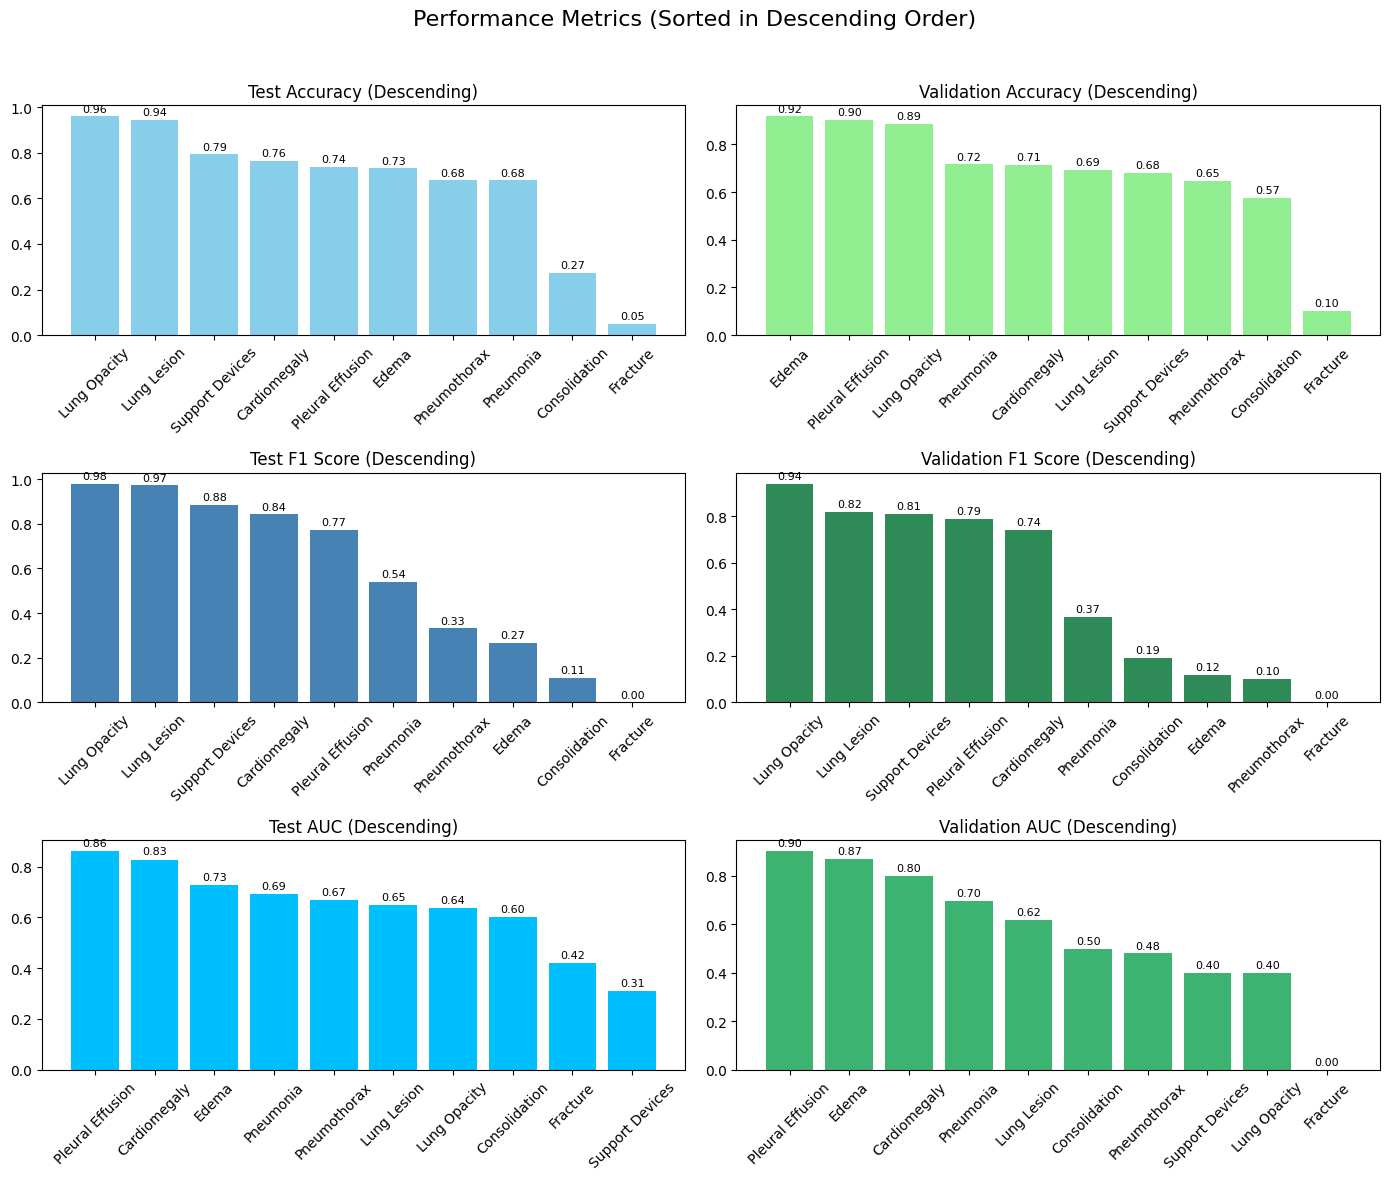

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
conditions = [
    "Pneumonia", "Pleural Effusion", "Pneumothorax", "Atelectasis", "Cardiomegaly",
    "Consolidation", "Edema", "Enlarged Cardiomediastinum", "Fracture",
    "Lung Lesion", "Lung Opacity", "Pleural Other", "Support Devices"
]
test_acc = [0.6792, 0.7385, 0.68, None, 0.7647, 0.2727, 0.7317, None, 0.05, 0.9444, 0.96, None, 0.7931]
test_f1 = [0.5405, 0.7733, 0.3333, None, 0.8421, 0.1111, 0.2667, None, 0, 0.9714, 0.9796, None, 0.8846]
test_auc = [0.6914, 0.8618, 0.6667, None, 0.8279, 0.6, 0.727, None, 0.4211, 0.6471, 0.6354, None, 0.31]
val_acc = [0.7155, 0.904, 0.6471, 0.8649, 0.7124, 0.575, 0.9176, None, 0.1, 0.6923, 0.885, 0.0909, 0.6792]
val_f1 = [0.3679, 0.7865, 0.1, 0.9265, 0.7412, 0.1905, 0.1176, None, 0, 0.8182, 0.939, 0, 0.809]
val_auc = [0.6964, 0.9026, 0.4796, 0.6754, 0.8012, 0.4974, 0.8711, None, 0, 0.6181, 0.4, 0.4, 0.4]

# Remove conditions with missing data
filtered_data = [
    (cond, t_acc, t_f1, t_auc, v_acc, v_f1, v_auc) for cond, t_acc, t_f1, t_auc, v_acc, v_f1, v_auc
    in zip(conditions, test_acc, test_f1, test_auc, val_acc, val_f1, val_auc)
    if None not in (t_acc, t_f1, t_auc, v_acc, v_f1, v_auc)
]
conditions, test_acc, test_f1, test_auc, val_acc, val_f1, val_auc = zip(*filtered_data)

# Sort data for each metric
def sort_metric(metric, conditions):
    sorted_data = sorted(zip(metric, conditions), reverse=True)
    return zip(*sorted_data)

test_acc, test_conditions_acc = sort_metric(test_acc, conditions)
test_f1, test_conditions_f1 = sort_metric(test_f1, conditions)
test_auc, test_conditions_auc = sort_metric(test_auc, conditions)

val_acc, val_conditions_acc = sort_metric(val_acc, conditions)
val_f1, val_conditions_f1 = sort_metric(val_f1, conditions)
val_auc, val_conditions_auc = sort_metric(val_auc, conditions)

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Performance Metrics (Sorted in Descending Order)', fontsize=16)

# Function to add numbers on bars
def add_numbers(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=8)

# Plot Test Accuracy
axes[0, 0].bar(test_conditions_acc, test_acc, color='skyblue')
axes[0, 0].set_title('Test Accuracy (Descending)')
axes[0, 0].tick_params(axis='x', rotation=45)
add_numbers(axes[0, 0], test_acc)

# Plot Validation Accuracy
axes[0, 1].bar(val_conditions_acc, val_acc, color='lightgreen')
axes[0, 1].set_title('Validation Accuracy (Descending)')
axes[0, 1].tick_params(axis='x', rotation=45)
add_numbers(axes[0, 1], val_acc)

# Plot Test F1
axes[1, 0].bar(test_conditions_f1, test_f1, color='steelblue')
axes[1, 0].set_title('Test F1 Score (Descending)')
axes[1, 0].tick_params(axis='x', rotation=45)
add_numbers(axes[1, 0], test_f1)

# Plot Validation F1
axes[1, 1].bar(val_conditions_f1, val_f1, color='seagreen')
axes[1, 1].set_title('Validation F1 Score (Descending)')
axes[1, 1].tick_params(axis='x', rotation=45)
add_numbers(axes[1, 1], val_f1)

# Plot Test AUC
axes[2, 0].bar(test_conditions_auc, test_auc, color='deepskyblue')
axes[2, 0].set_title('Test AUC (Descending)')
axes[2, 0].tick_params(axis='x', rotation=45)
add_numbers(axes[2, 0], test_auc)

# Plot Validation AUC
axes[2, 1].bar(val_conditions_auc, val_auc, color='mediumseagreen')
axes[2, 1].set_title('Validation AUC (Descending)')
axes[2, 1].tick_params(axis='x', rotation=45)
add_numbers(axes[2, 1], val_auc)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()